# 08. 모수적 회귀모형을 사용한 생존분석
#### 콕스비례위험모형은 기저위험함수 $h_0(t)$에 대한 모수적 가정을 하지 않으므로 준모수적 방법(semi-parametric)
- 콕스비례위험모형의 중요한 특징 중 하나

# 
#### 반면, 기저위험함수의 분포에 대한 정보가 있다면, 모수적 방법 사용 가능

# 
| 분포 | $S(t)$ | $h(t)$ |
| - | - | - |
| 지수분포 | $exp(-\lambda t)$ | $\lambda$ |
| 와이블분포 | $exp(\lambda t^{k})$ | $k \lambda t^{k-1}$ |
| 로그로지스틱분포 | ${1 \over {1 + \lambda t^p}}$ | ${{\lambda p t^{p-1}}\over{1+\lambda t}}$ |

In [7]:
library(survival)
library(autoReg)
library(eha)
library(tidyverse)

# 
# 
### 8-3 가속실패시간모형
- 모수적인 생존분석은 비례위험 가정을 필요로 하지 않음
- **모수적 방법들의 대부분은 비례위험모형이 아닌 가속실패시간(accelerated failure time, AFT) 모형**
    - 지수분포, 와이블분포는 비례위험 가정도 가능하며, AFT가정도 가능
- 생존시간 데이터에 대한 가속실패시간 모형은 모수적인 접근 방법이며, 비례위험모형에 대한 대안으로 활용
- **비례위험모형에서 공변량의 효과가 위험에 관련하여 나타나지만, 가속시간모형에서는 공변량의 효과가 생존시간에 관련하여 나타남**

# 
#### 가속실패시간에 대한 예 :
- 개는 사람에 비해 7배 빨리 노화가 진행
- **AFT관점에서, 개의 나이 10살은 사람의 나이로 70살에 해당 => 개가 10년동안 살 수 있는 확률은 사람이 70년 동안 살 수 있는 확률과 같음**
    - 개의 생존함수 $S_D (t)$ / 사람의 생존함수 $S_H (t)$ 
    - **$S_D(t) = S_H(7t)$**
    
#### AFT 모형에서는 생존시간을 예측변수의 함수로 기술
- 2개의 모집단에서 구한 생존함수를 각각 $S_1(t)$와 $S_2(t)$라고 할 때, AFT모형은 다음을 만족하는 상수 $\gamma < 0$이 존재한다고 가정
### $S_2(t) = S_1(\gamma t)\;\;for\;\;all\;\;t\geq0$ 
($\gamma$ : 가속인자(acceleration factor),  **상수**)

# 
- **예 : 흡연자와 비흡연자의 생존을 비교할 때 $exp(\alpha)=0.75$라고 가정하면, 비흡연자가 80세까지 살 확률은 흡연자가 $80(0.75) = 60$까지 살 확률과 같고, 비흡연자의 40세는 흡연자의 30세와 같게됨**
    - $S_2(t) = S_1(0.75t)$
- AFT 가정은 생존함수가 아닌 생존시간으로도 표현 가능 :
    - $T_2$를 비흡연자의 생존시간, $T_1$을 흡연자의 생존시간이라 할 때 => $T_1 = \gamma T_2$라고 표현 가능
    
# 
#### 가속인자는 AFT모형에서 중요한 추정치
- **위험비가 위험에 대한 예측변수의 효과를 추정하는 도구인 것 처럼, 생존시간에 대한 예측변수의 효과를 추정하는 도구**
- **가속인자는 어떤 집단과 다른 집단을 비교할 때 생존시간을 늘려주거나 축소시킨다고 표현할 수 있으며, 보다 정밀하게는 생존함수의 어떤 값에 대하여도 적용되는 생존시간의 비율**

# 
# 
### 8-2 지수분포모형
#### 지수분포는 감마분포의 특별한 형태로써, 위험함수 $h(t)$는 시간과 관계없이 일정
### $h(t) = \lambda$
#### 생존함수 
### $S(t)$ = $e^{-\lambda t}$
#### 확률밀도함수 
### $f(t) = \lambda \times e^{-\lambda x} = h(t) \times S(t)\;\;\;(t > 0)$
#### 누적분포함수
### $F(t;\lambda) = 1 - e^{-\lambda t} = 1 - S(t)\;\;\;(t > 0)$

# 
#### 지수분포 비례위험모형
- 위험함수가 시간과 관계없이 일정 (즉, $h(t) = \lambda$)
- **공변량의 값에 따라 위험이 결정되며, 그 값이 일정하다는 가정은 비례위험 가정보다 엄밀한 가정**
    - 위험이 일정할 경우, 위험비도 일정, **하지만, 위험비가 일정한 것은 위험이 일정한 것으로 귀결되지 않음**
    - 콕스모형에서는 기저위험함수에 대한 추정을 하지 않음
- **지수분포모형에서는 위험이 일정 vs 콕스모형에서는 위험비가 일정하지만 위험이 일정하지 않음**

# 
#### 예 : TRT = 치료군일 때 1, 대조군일 때 0
#### $h(t) = \lambda = exp(\beta_0 + \beta_1 \times TRT)$
#### 치료군일 때 : $h(t) = exp(\beta_0 + \beta_1)$ / 대조군일 때 $h(t) = \beta_0$
#### 치료군과 대조군의 위험비 : $HR(X = 1\;vs\;X = 0) = {{exp(\beta_0 + \beta_1)}\over{exp(\beta_0)}} = exp(\beta_1)$

#### ```phreg(, ... shape)```
- **```shape``` : 1일경우 지수분포, 0일경우 와이블 분포(default)**

# 
- ```trt```의 회귀계수 : -1.527
- Wald검정의 p-value < 0.005 => 통계적으로 유의
#### 치료군(trt = 1)의 위험비 : $exp(-1.527) \approx 0.22$ => 치료가 재발 위험을 감소시킴
(지수분포 비례위험모형은 $\beta_0$은 제공하지 않음)

In [6]:
anderson = anderson %>% mutate(trt = ifelse(rx == 1, 0, 1))
(fit = (phreg(Surv(time, status) ~ trt, anderson, shape = 1)))

Call:
phreg(formula = Surv(time, status) ~ trt, data = anderson, shape = 1)

Covariate          W.mean      Coef Exp(Coef)  se(Coef)    Wald p
trt                 0.664    -1.527     0.217     0.398     0.000 

log(scale)                    2.159               0.218     0.000 

 Shape is fixed at  1 

Events                    30 
Total time at risk           541 
Max. log. likelihood      -108.52 
LR test statistic         16.49 
Degrees of freedom        1 
Overall p-value           4.90309e-05

# 
#### 지수분포 AFT모형
#### ```survreg(, ... dist = "exponential")```

In [10]:
fit1 = survreg(Surv(time, status) ~ trt, anderson, dist = "exponential")
gaze(fit1) %>% myft()

a flextable object.
col_keys: ` `, `Value`, `Std. Error`, `z`, `p`, `ETR`, `LB`, `UB`, `HR`, `lower`, `upper` 
header has 1 row(s) 
body has 2 row(s) 
original dataset sample: 
—————————————————————————————————————————————————————————————————————————————————————————
               Value  Std. Error      z      p    ETR     LB      UB     HR  lower  upper 
—————————————————————————————————————————————————————————————————————————————————————————
(Intercept)    2.159       0.218  9.896  <.001  8.667  5.651  13.292  0.115  0.075  0.177 
trt            1.527       0.398  3.832  <.001  4.603  2.108  10.049  0.217  0.100  0.474 
—————————————————————————————————————————————————————————————————————————————————————————
Exponential distribution 
Loglik(model)= -108.5   Loglik(intercept only)= -116.8 
	Chisq= 16.49 on 1 degrees of freedom, p= 4.9e-05 
 n= 42 
 

#### AFT 가정하에서, TRT의 두 수준에 따라 생존시간의 비율이 일정
#### $S(t) = exp(-\lambda t)$
#### $log(S(t)) = \lambda t$

#### 양변을 $-\lambda$로 나눔 => $t = -{{log(S(t))}\over{\lambda}}$
#### ${{1}\over{\lambda}}=exp(\alpha_0 + \alpha_1 TRT)$로 놓으면
#### $t = -log(S(t)) \times exp(\alpha_0 + \alpha_1 \times TRT)$

#### 생존시간의 중앙값(median survival time) $t_m$일 때,  $S(t) = 0.5$이므로
#### $t_m = -log(0.5) \times exp(\alpha_0 + \alpha_1 \times TRT)$

#### 가속인자 $\gamma$는 TRT가 0인 군과 1인 군의 생존시간의 비율
### $\gamma = {{-log(S(t))\;\times\;exp(\alpha_a + \alpha_1)}\over {-log(S(t))\;\times\;exp(\alpha_0)}} = exp(\alpha_1)$

# 
#### AFT모형에서의 $\gamma$와 PH모형에서 $\gamma$를 비교하면
### AFT : ${1\over{\gamma}} = exp(\alpha_0 + \alpha_1 TRT)$
### PH : $\lambda = exp(\beta_0 + \beta_1 TRT)$

# 
#### PH모형에서 회귀계수 $exp(\beta_1) = \hat{HR}$이지만, AFT모형에서의 회귀계수 $exp(\alpha_1) = \hat{\gamma}$
- **이 모형에서 치료군에 대한 가속인자의 추정치 $\hat{\gamma} = exp(1.527) \approx 4.6$**
- **생존시간의 추정치$\hat{t} = -log(S(t))\times exp(2.159 + 1.527(TRT))$**

# 
#### 생존율이 각각 0.75, 0.5, 0.25일 때의 생존시간

| $S(t) = q$| $\hat{t}_{TRT=0}$| $\hat{t}_{TRT=1}$|
| - | - | - |
| $0.75$ | $2.5$ |$11.5$ |
| $0.5$ | $6.0$| $27.6$|
| $0.25$ |$12.0$ |$55.3$ |

# 
#### 각 행의 생존시간 비율 ${11.5 \over 2.5} = {27.6\over 6.0} = {55.3 \over 12.0} = 4.6$

# 
- 콕스비례위험모형과 비교

Warning message:
"Removed 42 rows containing missing values (`geom_line()`)."


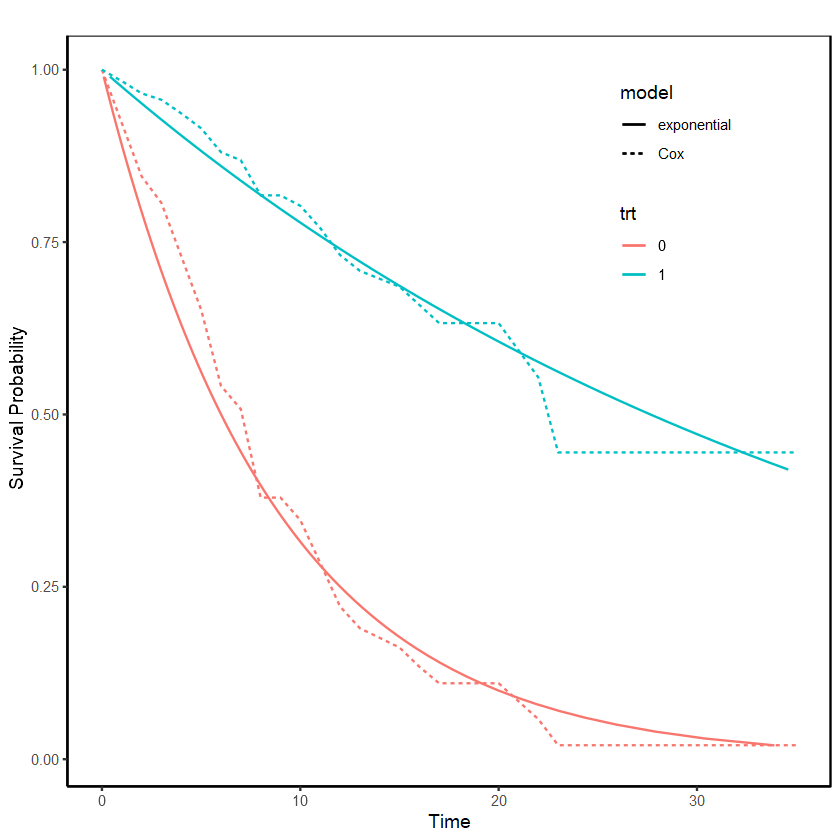

In [12]:
adjustedPlot(fit1, addCox = T)

# 
#### 가속인자의 추정치는 4.60 => 치료군에서 생존시간을 4.6배 늘려주는 효과
의학 관련 연구에서는 위험비가 보다 널리 사용되지만, 생존에 대한 치료 효과를 기술 할 때에는 가속인자가 직관적
#### 일반적으로 가속인자가 1이 넘을 경우 생존에 도움이 되며, 위험비가 1이 넘을 경우 생존에 해로움

In [13]:
gaze(fit1) %>% myft()

a flextable object.
col_keys: ` `, `Value`, `Std. Error`, `z`, `p`, `ETR`, `LB`, `UB`, `HR`, `lower`, `upper` 
header has 1 row(s) 
body has 2 row(s) 
original dataset sample: 
—————————————————————————————————————————————————————————————————————————————————————————
               Value  Std. Error      z      p    ETR     LB      UB     HR  lower  upper 
—————————————————————————————————————————————————————————————————————————————————————————
(Intercept)    2.159       0.218  9.896  <.001  8.667  5.651  13.292  0.115  0.075  0.177 
trt            1.527       0.398  3.832  <.001  4.603  2.108  10.049  0.217  0.100  0.474 
—————————————————————————————————————————————————————————————————————————————————————————
Exponential distribution 
Loglik(model)= -108.5   Loglik(intercept only)= -116.8 
	Chisq= 16.49 on 1 degrees of freedom, p= 4.9e-05 
 n= 42 
 

# 
# 
### 8-3 와이블모형
- 와이블모형(Weibull model)은 모수적 생존분석에서 가장 널리 쓰임 (Waloddi Weibull)
- **와이블분포는 다음과 같은 확률밀도함수 $f(x)$를 가짐**
### $f(x; \lambda, k) = {k\over \lambda}({x \over{\lambda}})^{k-1} e^{-(x / \lambda)^k}$
(의학이나 경제학 영역에서는 척도모수 $b = {1 \over {\lambda^k}}$로 치환하여 사용)

# 

#### t가 와이블분포를 따르는 경우, 누적위험함수 
### $H(t) = \lambda t^k$
#### 생존함수 
### $S(t) = exp(-\lambda t^k)$
#### 누적위험함수를 t에 대하여 미분하면 위험함수 
###  $h(t) = k\lambda t^{k-1}\;\;\;(where\;k>0\;and\;\lambda > 0)$

# 
#### k는 형태모수 (shape parameter), 위험함수의 형태를 결정
- **k > 1인 경우, 시간이 경과함에 따라 위험이 증가**
- **K < 1인 경우, 시간이 경과함에 따라 위험이 감소**
- **k = 1인 경우 위험이 일정하며, 와이블모형이 지수모형으로 변경**
    - $h(t) = \lambda$

# 
#### 와이블모형에서 AFT가정을 만족한다면, PH모형도 만족
- **비례위험 가정은 여러 군에서 위험비를 추정할 수 있게 해주며, AFT가정은 가속인자를 추정함으로써 생존시간에 대한 직접적인 효과를 설명**
- 와이블모형서 생존함수의 log(-log)를 취하면, 생존시간의 로그와 선형관계를 이룸
    - 즉, $klog(\lambda)$를 y절편으로 하고, 기울기가 k인 직선 (기울기가 1이면 지수분포)
#### $S(t) = exp(-\lambda t^k)$
#### $log(-log(S(t))) = log(\lambda) + klog(t)$

# 
- 산점도가 직선형태가 아니기에, 와이블분포는 부적절

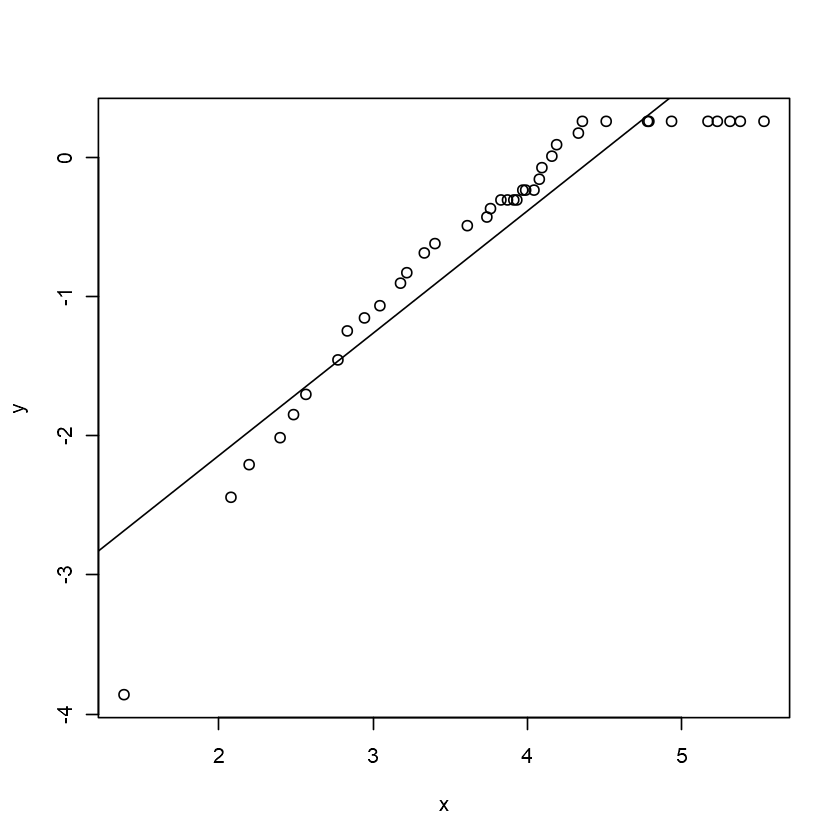

In [14]:
library(asaur)
fit = survfit(Surv(timeWeeks, delta) ~ 1, data = gastricXelox)
y = log(-log(fit$surv)); x = log(fit$time)
m = lm(y ~ x)
plot(x, y)
abline(m)
# loglogplot(fit)

- 산점도가 거의 직선형태이므로, 와이블분포 가정이 적절

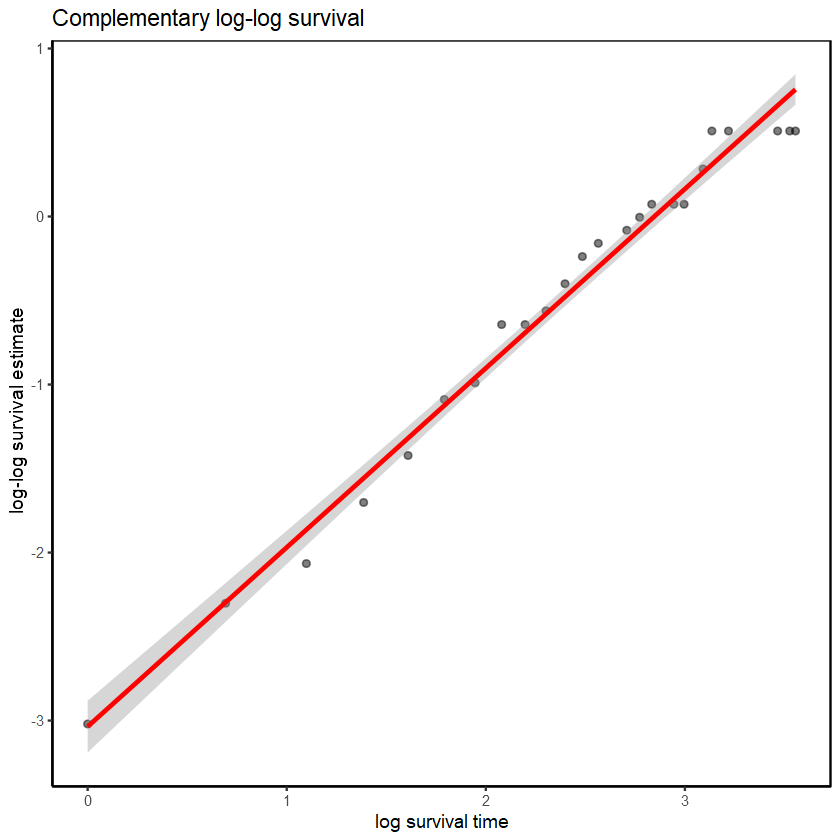

In [20]:
fit1 = survfit(Surv(time, status) ~ 1, anderson)
loglogplot(fit1)

# 
- 치료군과 대조군의 산점도가 모두 직선형태 => 와이블분포 가정에 합당
    - **두 직선의 기울기가 거의 같아보임 => 비례위험 가정에도(AFT 가정에도) 합당**
    - 만일 두 직선의 기울기가 1이라면, 생존시간은 지수분포를 따름

Warning message:
"Removed 3 rows containing non-finite values (`stat_smooth()`)."


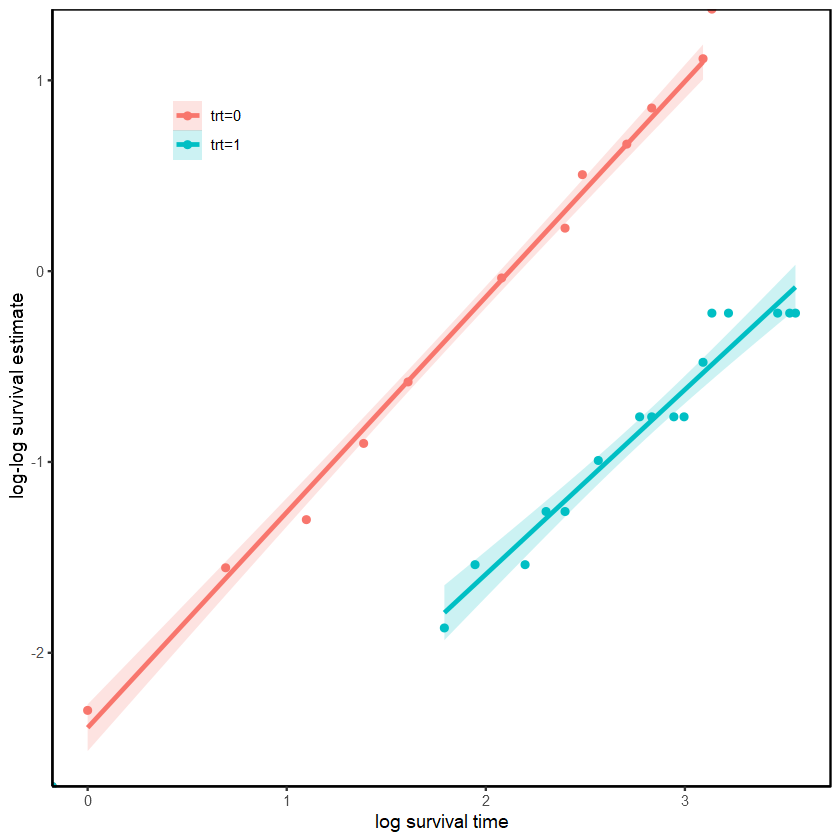

In [23]:
fit2 = survfit(Surv(time, status) ~ trt, anderson)
loglogplot(fit2, type = "p")

# 
#### 공변량의 수준이 2개 이상일 때 $log(-log(\hat{S}(t)))$와 $log(t)$의 그래프에서 볼 수 있는 결과 :
- **직선이면 와이블분포 가정** 
- **선들이 평행하면 비례위험(PH)가정을 만족**

# 

1. **평행한 직선일 때 : 와이블, PH, AFT 가정 만족**
2. **평행한 직선이며 기울기가 1일 때 : 지수분포이며, PH, AFT가정 만족**
3. **평행하지만 직선이 아닐 때 : PH만족, 와이블 아님, AFT 위배(이때는 콕스모형 사용)**
4. **평행하지도 않고 직선도 아닐 때 : 와이블 아님, PH가정 위배**
5. **평행하지 않지만 직선일 때 : 와이블 만족, PH위배, AFT 위배, k가 수준에 따라 다름**

# 
#### 와이블비례위험모형
#### ```phreg(, ... dist = "weibull")```

In [25]:
library(eha)

# 
- 위험함수 $h(t) = k \lambda t^{k-1}$
- $\lambda = exp(\beta_0 + \beta_1 \times TRT)$
#### $HR = {{exp(\beta_0 + \beta_1)k t^{k-1}}\over{exp(\beta_0)k t^{k-1}}}$

# 

#### $\beta_1 = -1.731$, 위험비 : $exp(-1.731) = 0.177$ => 치료가 생존에 도움이 되었음
#### 형태모수 k : $log(k) = 0.312$ 
- 귀무가설 $log(k) = 0$에 대한 검정의 결과 : p-value < 0.05 => 귀무가설 기각

In [27]:
fit3 = phreg(Surv(time, status) ~ trt, anderson, dist = "weibull")
fit3

Call:
phreg(formula = Surv(time, status) ~ trt, data = anderson, dist = "weibull")

Covariate          W.mean      Coef Exp(Coef)  se(Coef)    Wald p
trt                 0.664    -1.731     0.177     0.413     0.000 

log(scale)                    2.248               0.166     0.000 
log(shape)                    0.312               0.147     0.034 

Events                    30 
Total time at risk           541 
Max. log. likelihood      -106.58 
LR test statistic         19.65 
Degrees of freedom        1 
Overall p-value           9.29142e-06

# 
#### 와이블 AFT모형
#### 와이블 AFT모형에서의 생존함수 : $S(t) = exp(-\lambda t^k)$
### $-log(S(t)) = \lambda t^k$
#### 양변을 $\lambda$로 나누고, $1/k$로 지수를 취하고, 좌우를 바꿀 시
### $t = ({{-log(S(t))}\over{\lambda}})^{1/k}$
#### ${1 \over {\lambda^{1/k}}} = exp(\alpha_0 + \alpha_1 TRT)$로 놓으면
### $t = (-log(S(t))^{1/k}) \times exp(\alpha_0 + \alpha_1 TRT)$

# 
#### AFT 가정은 모든 고정된 $S(t) = q$에 대해 시간분위수의 비가 일정한 값 $\gamma$를 가짐
#### $S(t) = q$로 놓으면
### $t = (-log(q))^{1/k} \times exp(\alpha_0 + \alpha_1 TRT)$

# 
#### 치료군(TRT = 1)과 대조군(TRT = 0)에서 같은 k를 갖는다고 할 때, 가속인자 $\gamma$를 구하면
### $\gamma = {{(-log(q))^{1/k}\times exp(\alpha_0 + \alpha_1)}\over{(-log(q))^{1/k} \times exp(\alpha_0)}} = exp(\alpha_1)$

# 
#### **Scale (척도모수 $k$의 추정치) = 0.732**
- 척도모수 : 형태모수의 역수

#### **log(scale) = -0.312**, (p-value < 0.05)

#### 가속인자의 추정치 : $exp(1.267) = 3.55$
- 앞 절에서의 지수분포모형의 가속인자 추정량 : 4.6 (지수분포모형에서 위험이 일정하다는 훨씬 엄격한 가정을 사용)

In [28]:
fit4 = survreg(Surv(time, status) ~ trt, anderson, dist = "weibull")
summary(fit4)


Call:
survreg(formula = Surv(time, status) ~ trt, data = anderson, 
    dist = "weibull")
             Value Std. Error     z       p
(Intercept)  2.248      0.166 13.55 < 2e-16
trt          1.267      0.311  4.08 4.5e-05
Log(scale)  -0.312      0.147 -2.12   0.034

Scale= 0.732 

Weibull distribution
Loglik(model)= -106.6   Loglik(intercept only)= -116.4
	Chisq= 19.65 on 1 degrees of freedom, p= 9.3e-06 
Number of Newton-Raphson Iterations: 5 
n= 42 


#### 와이블 AFT 모형과 와이블 PH모형의 회귀계수 간의 관계
#### 와이블 AFT모형에서의 위험함수
- $AFT : {1\over{\lambda ^{1/k}}} = exp(\alpha_0 + \alpha_1 TRT)$
- $(1/k)log \lambda = - (\alpha_0 + \alpha_1 TRT)$
- $log \lambda = - k(\alpha_0 + \alpha_1 TRT)$

#### 와이블 PH모형에서의 위험함수
- $PH : \lambda = -exp(\beta_0 + \beta_1 TRT)$
- $log\lambda = \beta_0 + \beta_1 TRT$

#### 따라서
$\beta_j = -a \times k = - {\alpha \over \sigma}$
(지수분포에서 $\beta_j = -\alpha_j$)

$-1.731 = -(1.267)(1.366) = -{1.267 \over 0.732}$

In [30]:
gaze(fit4) %>% myft()

a flextable object.
col_keys: ` `, `Value`, `Std. Error`, `z`, `p`, `ETR`, `LB`, `UB`, `HR`, `lower`, `upper` 
header has 1 row(s) 
body has 3 row(s) 
original dataset sample: 
———————————————————————————————————————————————————————————————————————————————————————————
                Value  Std. Error       z      p    ETR     LB      UB     HR  lower  upper 
———————————————————————————————————————————————————————————————————————————————————————————
(Intercept)     2.248       0.166  13.547  <.001  9.472  6.842  13.114  0.046  0.030  0.072 
trt             1.267       0.311   4.080  <.001  3.551  1.932   6.529  0.177  0.077  0.407 
Log(scale)     -0.312       0.147  -2.116   .034  0.732                 1.531               
———————————————————————————————————————————————————————————————————————————————————————————
Weibull distribution 
Loglik(model)= -106.6   Loglik(intercept only)= -116.4 
	Chisq= 19.65 on 1 degrees of freedom, p= 9.29e-06 
 n= 42 
 

Warning message:
"Removed 34 rows containing missing values (`geom_line()`)."


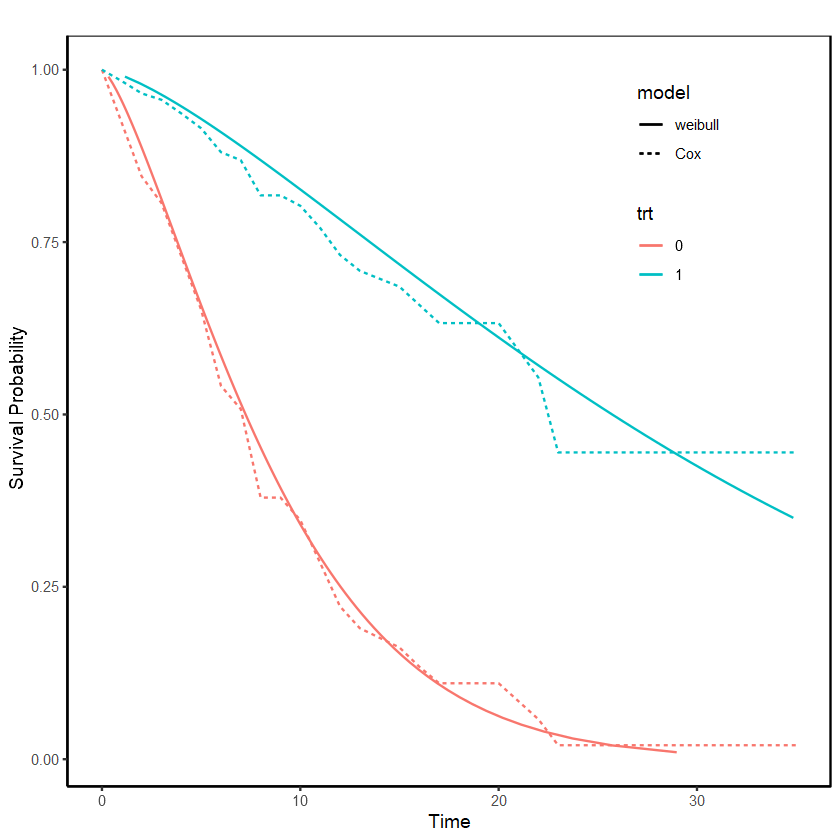

In [31]:
adjustedPlot(fit4, addCox = T)

# 
# 
### 8-4 와이블모형에서의 변수의 선택과 모형진단
#### 와이블모형 적합

- 각 공변량에 대한 회귀계수, 표준오차, p-value 확인
- 척도모수와, 로그가능도비검정 결과 확인 가능(p-value < 0.05 => 해당 모형은 통계적으로 유의)

In [32]:
fit = survreg(Surv(time, status) ~ ph.ecog + sex + age, lung, dist = "weibull")
summary(fit)


Call:
survreg(formula = Surv(time, status) ~ ph.ecog + sex + age, data = lung, 
    dist = "weibull")
               Value Std. Error     z       p
(Intercept)  6.27344    0.45358 13.83 < 2e-16
ph.ecog     -0.33964    0.08348 -4.07 4.7e-05
sex          0.40109    0.12373  3.24  0.0012
age         -0.00748    0.00676 -1.11  0.2690
Log(scale)  -0.31319    0.06135 -5.11 3.3e-07

Scale= 0.731 

Weibull distribution
Loglik(model)= -1132.4   Loglik(intercept only)= -1147.4
	Chisq= 29.98 on 3 degrees of freedom, p= 1.4e-06 
Number of Newton-Raphson Iterations: 5 
n=227 (1 observation deleted due to missingness)


# 
#### 위의 회귀계수는 임상적으로 의미가 없기에 위험비(HR)와 이벤트시간비(event time ratio, ETR)을 표현
#### ```ConvertWeibull()``` :
- 첫 번째 테이블인 $\$vars$ : 
    - 척도모수 $\lambda$와 형태모수 $\gamma$가 기록
    - 각 공변량에 대한 추정량 기록 : **```survreg()```의 회귀계수와 다름**
        - $\beta = {-\alpha / \sigma}$로 각 공변량의 회귀계수 $\alpha$를 척도모수인 $\sigma$로 나눈 값에 -1을 곱한 값
- 두 번째 테이블인 $\$HR$ :
    - 위험비와 95% 신뢰구간
- 세 번째 테이블인 $\$ETR$ :
    - 이벤트 시간비와 95% 신뢰구간이 표현
    - **여성인 경우 (sex = 1) 남성(sex = 0)에 비해 사망위험이 42\% 감소하며 (HR = 0.58), 생존시간이 약 50\% 증가 (ETR = 1.49)**
    - (의학논문에는 HR이 많이 기술)

In [36]:
library(SurvRegCensCov)

In [37]:
ConvertWeibull(fit)

$vars
             Estimate           SE
lambda   0.0001876914 0.0001506884
gamma    1.3677851193 0.0839087686
ph.ecog  0.4645519368 0.1136759822
sex     -0.5486056737 0.1673299432
age      0.0102247948 0.0092298732

$HR
               HR        LB        UB
ph.ecog 1.5913010 1.2734772 1.9884447
sex     0.5777548 0.4162096 0.8020013
age     1.0102772 0.9921654 1.0287197

$ETR
              ETR        LB        UB
ph.ecog 0.7120280 0.6045610 0.8385984
sex     1.4934525 1.1718447 1.9033242
age     0.9925524 0.9794818 1.0057975

# 
#### 와이블가정 평가
- 남성과 여성이 log(-log(생존시간)) 그림이 비교적 직선적이며 평행하다고 볼 수 있음 => **AFT가정 및 PH가정을 만족**

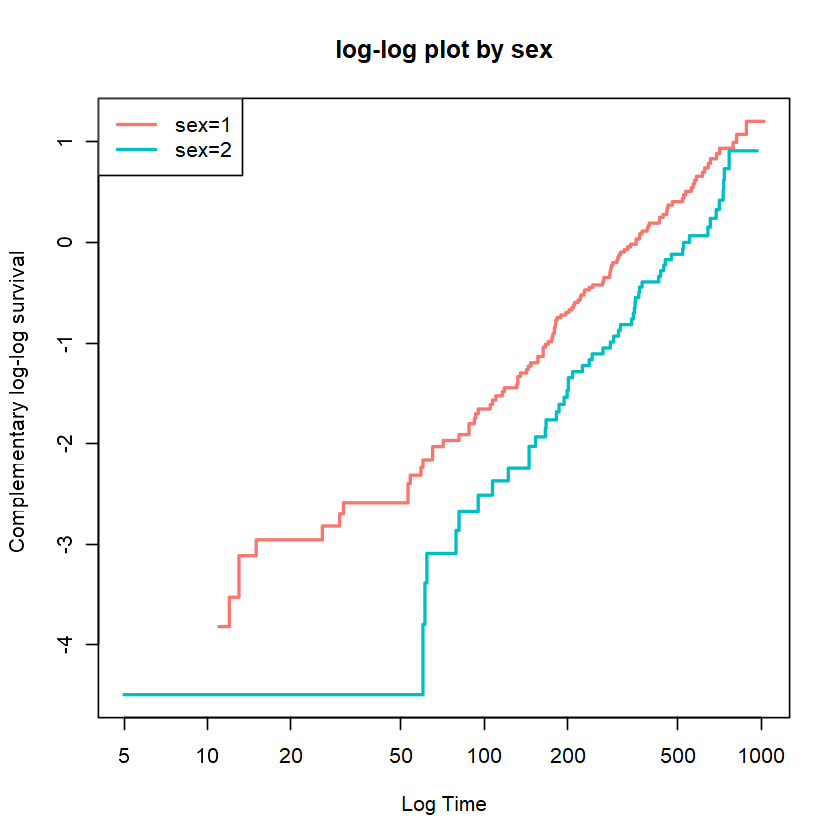

In [38]:
loglogplot(survfit(Surv(time, status) ~ sex, lung))

# 
#### 그래프를 통한 적합도 검정
#### ```check.dist()``` : 그래프를 통해 모형의 적합도를 검정
- 점선 : 모수모형인 와이블모형
- 실선 : 준모수적인 콕스모형

In [39]:
library(eha)

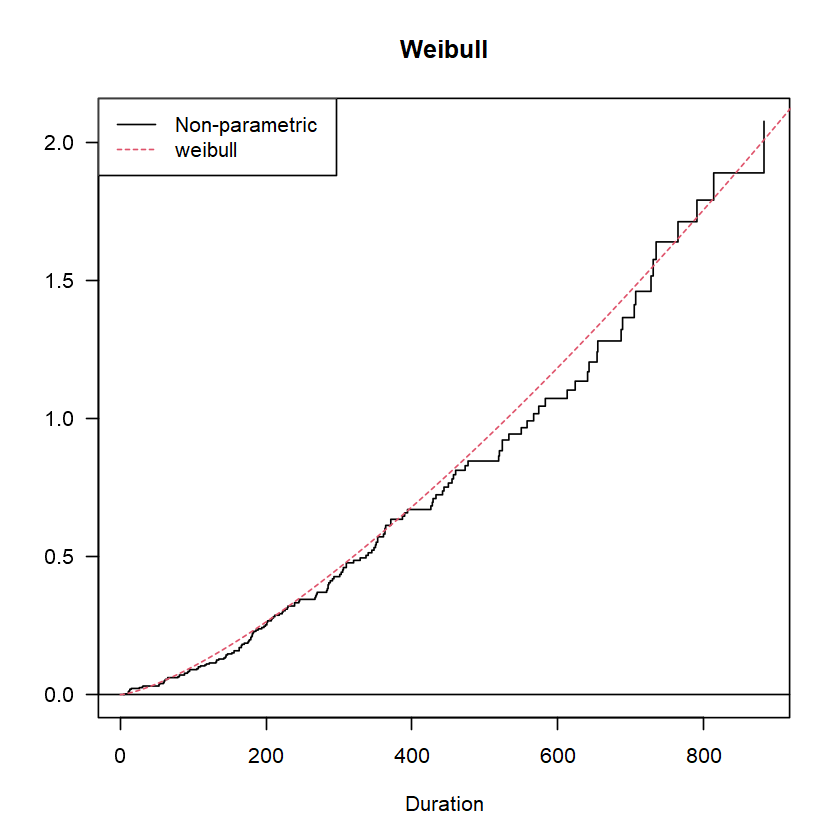

In [40]:
fit1 = phreg(Surv(time, status) ~ ph.ecog + sex + age, lung, dist = "weibull")
fit2 = coxreg(Surv(time, status) ~ ph.ecog + sex + age, lung)
check.dist(fit2, fit1)

- 각각 다른 나이에 따른 생존곡선

Warning message:
"Removed 1 row containing missing values (`geom_line()`)."


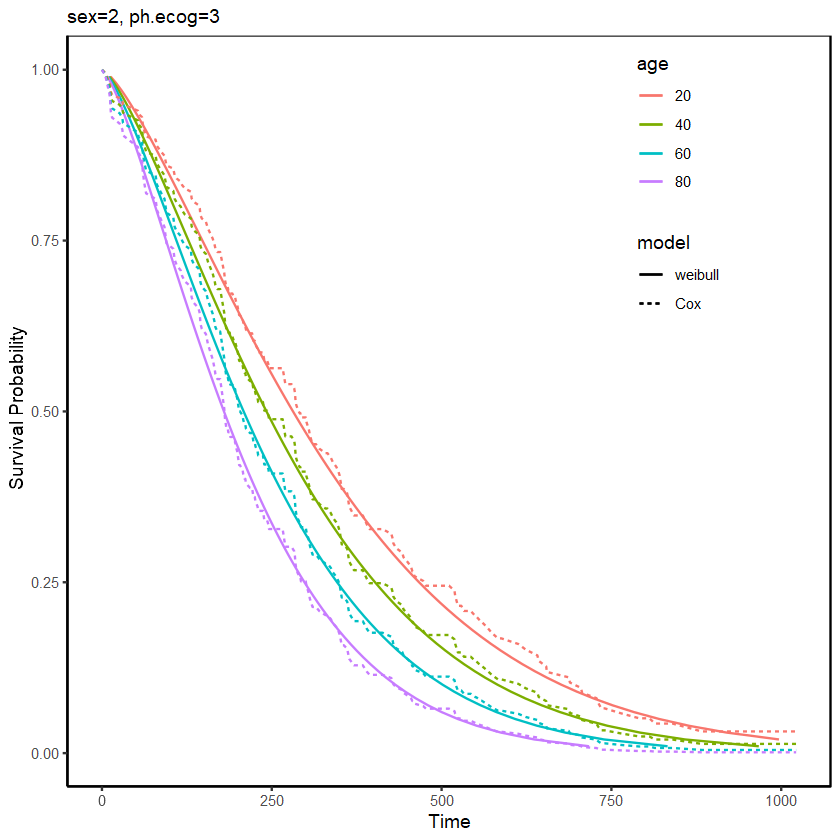

In [41]:
adjustedPlot(fit, pred.values = list(age = c(20, 40, 60, 80), sex = 2, ph.ecog = 3), addCox = T)

#### 모수모형의 생존추정곡선이 콕스모형과 잘 맞음을 확인

# 
# 
#### 예측변수의 선택
- 관련있을 것으로 예상되는 변수들과 상호작용 등을 모두 포함시킨 후에 ```anova()```함수를 통해 변수 선택

# 
#### ```pms()```

In [49]:
library(rms)

In [51]:
psm.lung = psm(Surv(time, status) ~ ph.ecog + sex * age + ph.karno + pat.karno + meal.cal + wt.loss, lung, dist = "weibull")

In [53]:
psm.lung

Parametric Survival Model: Weibull Distribution

psm(formula = Surv(time, status) ~ ph.ecog + sex * age + ph.karno + 
    pat.karno + meal.cal + wt.loss, data = lung, dist = "weibull")

                    Model Likelihood    Discrimination    
                          Ratio Test           Indexes    
Obs         168    LR chi2     31.67    R2       0.172    
Events      121    d.f.            8    R2(8,168)0.131    
sigma 0.6898057    Pr(> chi2) 0.0001    R2(8,121)0.178    
                                        Dxy      0.317    

            Coef    S.E.   Wald Z Pr(>|Z|)
(Intercept)  9.4470 1.7436  5.42  <0.0001 
ph.ecog     -0.5607 0.1506 -3.72  0.0002  
sex         -1.3642 0.9783 -1.39  0.1631  
age         -0.0446 0.0230 -1.94  0.0529  
ph.karno    -0.0182 0.0075 -2.42  0.0155  
pat.karno    0.0104 0.0055  1.88  0.0601  
meal.cal     0.0000 0.0002 -0.07  0.9439  
wt.loss      0.0105 0.0054  1.96  0.0498  
sex * age    0.0277 0.0155  1.79  0.0728  
Log(scale)  -0.3713 0.0720 -5

# 
- **카이제곱 통계량과 함께 자유도와 카이제곱의 p-value**
    - ```meal.cal```이 가장 중요성이 떨어지며, ```ph.ecog```변수가 가장 중요

In [52]:
anova(psm.lung)

,Chi-Square,d.f.,P
ph.ecog,13.859716181,1,1.969757e-04
sex (Factor+Higher Order Factors),10.236550163,2,5.986340e-03
All Interactions,3.217625072,1,7.284925e-02
age (Factor+Higher Order Factors),3.751754635,2,1.532205e-01
All Interactions,3.217625072,1,7.284925e-02
ph.karno,5.859421550,1,1.549389e-02
pat.karno,3.535731914,1,6.005982e-02
meal.cal,0.004952998,1,9.438932e-01
wt.loss,3.847527294,1,4.981939e-02
sex * age (Factor+Higher Order Factors),3.217625072,1,7.284925e-02


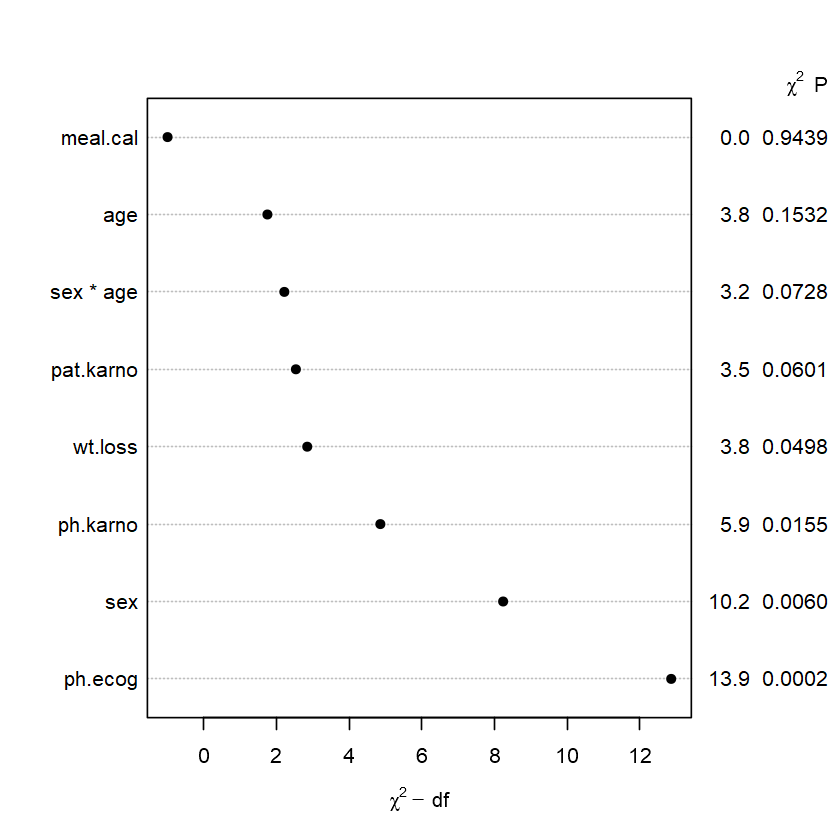

In [54]:
plot(anova(psm.lung, margin = c("chisq", "d.f", "P")))

# 
#### 후진 제거법 
- 관련 있을 것으로 예상되는 예측변수들을 모두 투입한 후 Wald검정을 통해 각 변수들의 각 변수들의 상대적 중요성을 검정

#### ```fastbw(, ... rule)```
- **```rule``` : 변수 선택 기준 ("P" : p-value 기준 / "aic" : AIC 값 기준)**

# 
- ```meal.cal```, ```sex```, ```pat.karno```, ```wt.loss```가 AIC값을 기준으로 모형에서 제외됨을 확인

In [60]:
fastbw(psm.lung, rule = "aic")


 Deleted   Chi-Sq d.f. P      Residual d.f. P      AIC  
 meal.cal  0.00   1    0.9439 0.00     1    0.9439 -2.00
 sex       1.94   1    0.1634 1.95     2    0.3777 -2.05
 pat.karno 2.75   1    0.0970 4.70     3    0.1950 -1.30
 wt.loss   2.36   1    0.1248 7.06     4    0.1328 -0.94

Approximate Estimates after Deleting Factors

                 Coef     S.E. Wald Z         P
(Intercept)  8.276947 0.936299  8.840 0.000e+00
ph.ecog     -0.546884 0.137424 -3.980 6.905e-05
age         -0.015444 0.007976 -1.936 5.283e-02
ph.karno    -0.015375 0.007394 -2.080 3.757e-02
sex * age    0.005949 0.002182  2.727 6.395e-03

Factors in Final Model

[1] ph.ecog   age       ph.karno  sex * age

# 
#### 와이블회귀모형의 시각화
- 와이블모형은 예측변수들이 다른 새로운 환자들의 예후를 추정하는데 사용 가능
- 와이블모형의 결과는 주어진 공변량들의 조합에 해당하는 생존시간의 중앙값(median survival time)

# 
#### ```showEffect()```

# 
- 생존시간에 대한 나이의 효과는 성별에 따라 달라짐을 확인
    - 남성은 나이가 많은 환자일수록, 생존시간이 짧아지지만, 여성은 나이가 많을수록 생존시간이 길어짐

Call:
survreg(formula = Surv(time, status) ~ ph.ecog + sex * age, data = lung, 
    dist = "weibull")

Coefficients:
(Intercept)     ph.ecog         sex         age     sex:age 
 7.83265357 -0.35965574 -0.74617308 -0.03181470  0.01819731 

Scale= 0.7280636 

Loglik(model)= -1131.6   Loglik(intercept only)= -1147.4
	Chisq= 31.65 on 4 degrees of freedom, p= 2.25e-06 
n=227 (1 observation deleted due to missingness)

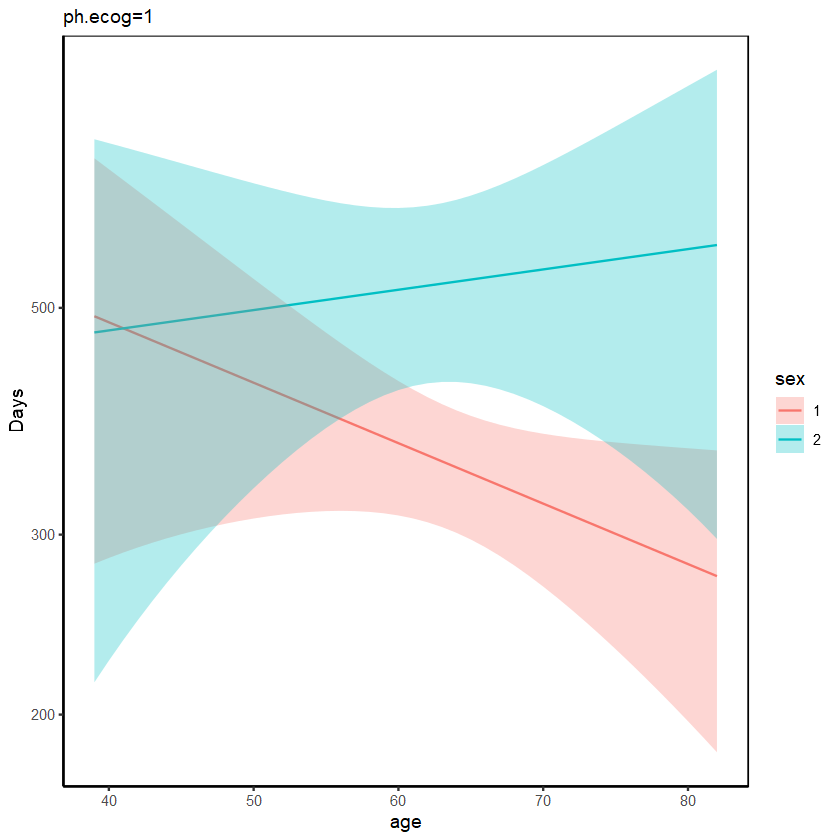

In [71]:
fit = survreg(Surv(time, status) ~ ph.ecog + sex*age, lung, dist = "weibull")
showEffect(fit)
fit

# 
#### 잔차분석

- ```ph.ecog```와 ```sex```의 경우, 각 수준에 따른 잔차가 비슷
- ```age```와 ```sex:age```의 상호작용에 관한 잔차는 선형형태로 보여, 모형에는 큰 문제가 없는 것으로 판단

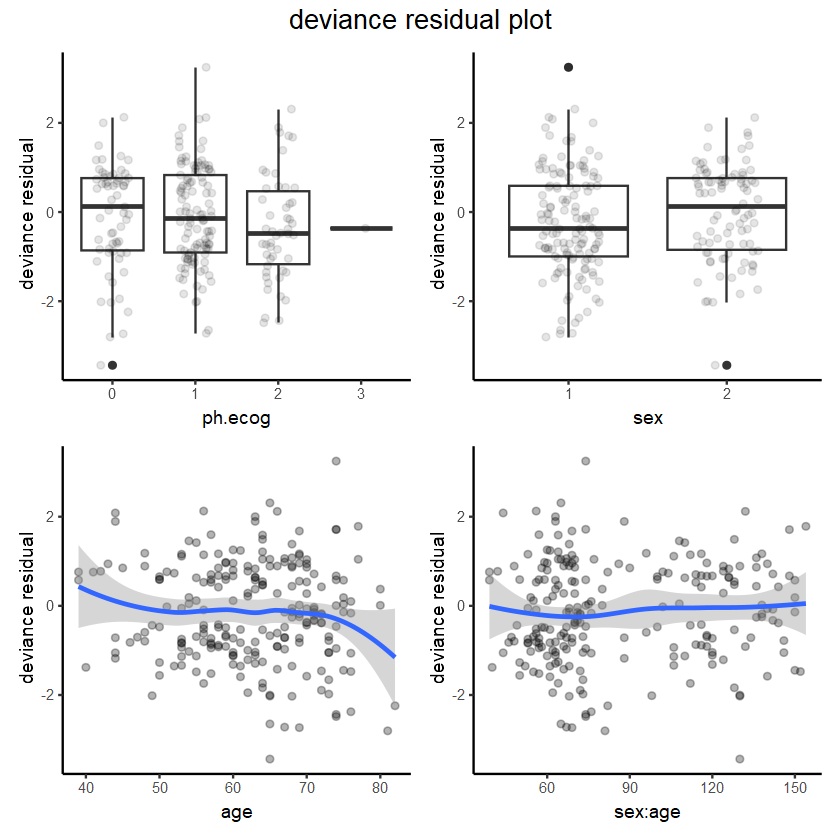

In [72]:
residualPlot(fit, type = "deviance")

- 각 대상환자가 제외되었을 때 회귀계수에 미치는 효과
    - **데이터가 결측치가 있는 경우, 잔차는 계산되지 않음** 
    - 현재 모형에 사용된 열 중, ph.ecog에 1개의 결측치가 존재 (14번 환자) => 따라서 ```age```에서 가장 영향력이 큰 대상환자 5명은 3, 6, 74, 85, 89번 환자


In [74]:
colSums(is.na(lung))

inst      time    status       age       sex   ph.ecog  ph.karno pat.karno 
        1         0         0         0         0         1         1         3 
 meal.cal   wt.loss 
       47        14

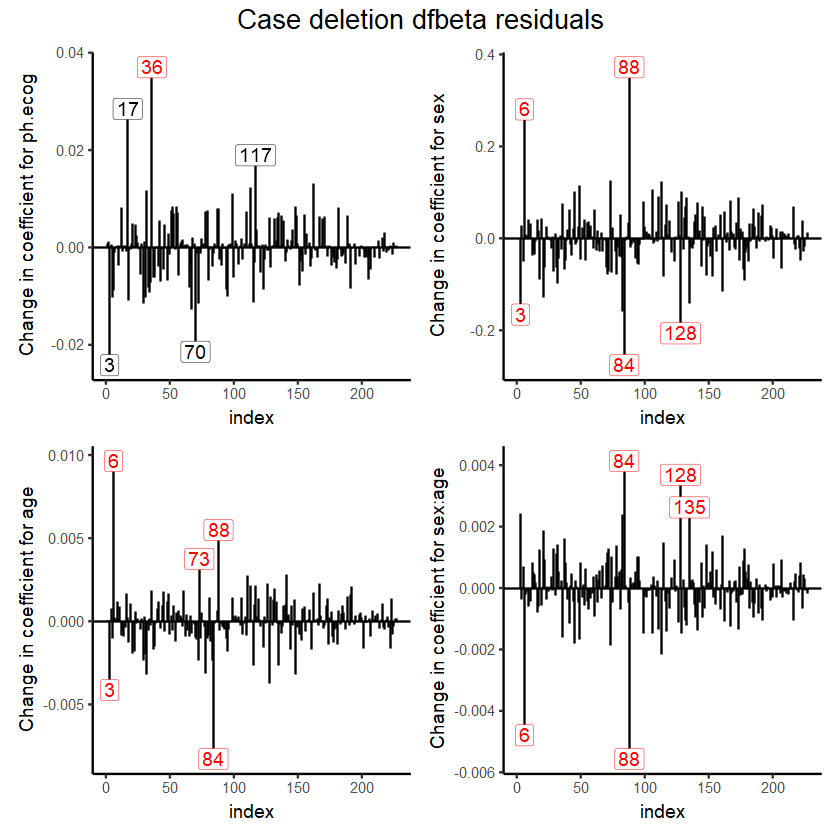

In [73]:
residualPlot(fit, type = "dfbeta")

# 
# 
### 8-5 로그로지스틱모형 (loglogistic)
#### 로그로지스틱분포는 음수가 아닌 무작위변수에 대한 연속확률분포
- 척도모수 $\alpha > 0$과 형태모수 $\beta >0$을 가짐

# 
#### 누적분포함수
### $F(x; \alpha, \beta) = {1 \over {1 + (x / \alpha)^{-\beta}}} = {{(x / \alpha)^\beta}\over{1 + (x/\alpha)^{\beta}}} = {{x^{\beta}}\over{\alpha^\beta + x^{\beta}}}$
#### 확률밀도함수
### $f(x; \alpha, \beta) = {{(\beta / \alpha) (x / \alpha)^{\beta - 1}}\over{(1 + (x / \alpha)^\beta)^2}}$
#### 생존함수
### $S(t) = 1 - F(t) = {1 \over {1 + (t / \alpha)^\beta}}$ = $1\over{1 + \lambda t^p}$$\;\;\;(1/\alpha^\beta = \lambda, p = \beta)$
#### 위험함수
### $h(t) = {{\lambda p t^{p-1}}\over{1 + \lambda t^p}}$
- **p가 1이하인 경우, 시간에 따라 위험이 감소하는 단조감소 형태를 보이지만, p가 1 이상인 경우 처음에는 위험이 증가하다가 이후 위험이 감소하는 단봉형(unimodal)형태**

# 
#### 로그로지스틱 AFT모형은 비례위험모형이 아니지만, 비례오즈(proportional odds, PO)모형
- PO 생존모형은 생존오즈가 시간이 경과하더라도 일정하게 유지
- **생존오즈 : 시간 t까지 이벤트가 발생하지 않을 확률을, 발생할 확률로 나눈 것**
### $Survival\;odds:{{S(t)}\over{1-S(t)}} = {{P(T > t)}\over{P(T \leq t)}}$

# 

- **실패오즈 : 생존오즈의 역수**
### $Failure\;odds = {{1 - S(t)}\over{S(t)}} = {{P(T\leq t)}\over{P(T > t)}}$

# 
#### 로그로지스틱모형의 생존함수 & 실패함수
### $S(t) = {1 \over{1+\lambda t^p}}$
### $F(t) = 1 - S(t) = {{\lambda t ^p}\over{1+\lambda t^p}}$

# 
#### 실패오즈
### ${{1-S(t)}\over{S(t)}} = {{{{\lambda t^p}\over{1+\lambda t^p}}}\over{{{1}\over{1+\lambda t^p}}}} = \lambda t^p$

# 
#### 로그로지스틱회귀모형에서 $\lambda$를 예측변수와 회귀계수로 다시 사용가능
#### 생존오즈비 (survival ods ratio, SOR)
- **생존오즈비가 시간에 관계없이 일정하다면, 비례오즈(PO)가정을 만족**
- **생존오즈비가 시간과 관계없이 일정하다면, 실패오즈비도 시간과 관계없이 일정**
### $SOR = {{S_1(t)\;/\;(1-S_1(t))}\over{S_2(t)\;/\;(1-S_2(t))}}$

# 

#### 로그 실패오즈
- y절편이 $log(\lambda)$이고, 기울기가 $p$인 직선의 형태
- **생존시간이 로그로지스틱분포를 따르면, Kaplan-Meier 생존추정치인 $\hat{S}(t)$를 이용하여 $log(1-\hat{S}(t)\;/\;\hat{S}(t))$와 $log(t)$를 그래프로 그리면 기울기가 $p$인 직선의 형태를 가짐**
    - (로그 생존오즈는 기울기가 $-p$인 직선)
### $log(Failure\;Odds) = log(\lambda t^p) = log(\lambda) + plog(t)$

# 
- 백혈구 수치가 중간인 군(```WBCCAT``` = 1)과 벽혈구 수치가 높은 군(```WBCCAT``` = 2) 모두 산점도가 직선형태
- **따라서, 시간이 로그로지스틱분포를 갖는다는 가정은 합당한 것으로 판단**
- **또한, 두 직선이 비교적 평행하므로 비례오즈(PO)가정 또한 합당**
- **로그로지스틱모형에서 PO가정을 만족하면 AFT가정도 만족**

Warning message:
"Removed 3 rows containing non-finite values (`stat_smooth()`)."


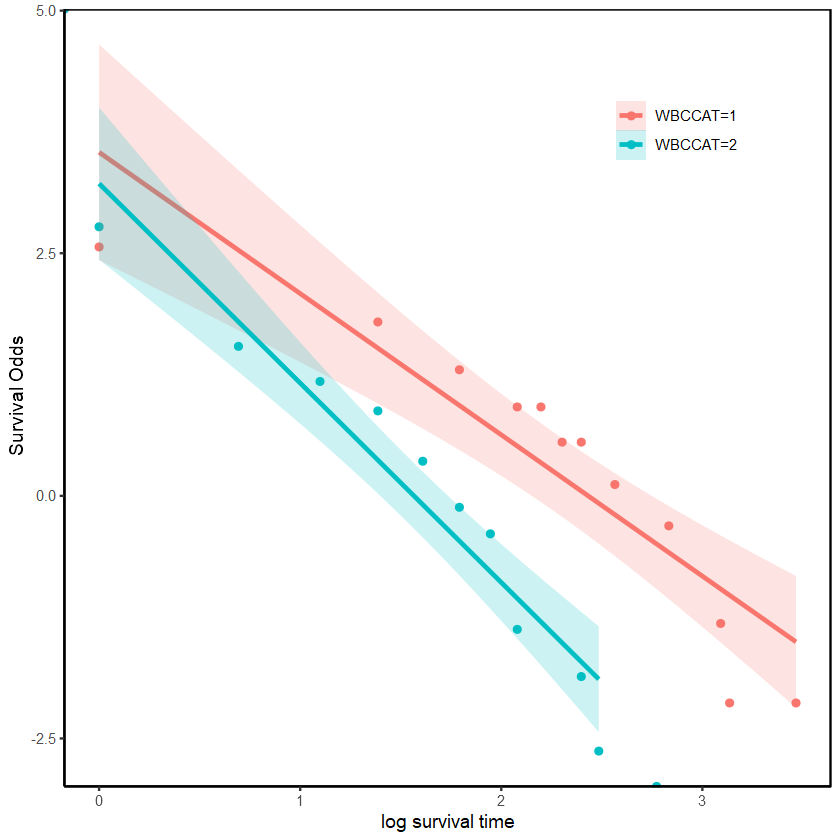

In [76]:
fit = survfit(Surv(time, status) ~ WBCCAT, anderson2)
loglogplot(fit, type = "p", what = "survOdds")

# 
#### AFT 로그로지스틱모형의 생존함수($S(t)$)를 $t$에 대해 풀면
### $S(t) = {1 \over {1+\lambda t^p}} = {1 \over {1 + (\lambda^{1/p} t)^p}}$
### $t = [{1 \over{S(t)}}-1]^{1/p} \times {1\over \lambda^{1/p}}$

# 
#### $1\over{\lambda^{1/p}}=exp(\alpha_0 + \alpha_1 WBCCAT)$로 놓으면
#### $t = [{1\over{S(t)}}-1]^{1/p}\times exp(\alpha_0 + \alpha_1 WBCCAT)$

# 
#### $S(t) = q$로 대체하면
#### $t = [q^{-1}-1]^{1/p} \times exp(\alpha_0 + \alpha_1 WBCCAT)$
- 예 : 중앙생존시간 $t_m(q = 0.5) = [2-1]^{1/p}\times exp(\alpha_0 + \alpha_1 WBCCAT)$

# 
#### 가속인자 $\gamma$는 WBCCAT = 2인 군의  $S(t)=q$일 때의 시간과 WBCCAT = 1인 군의 $S(t)=q$일 때의 시간비로 구할 수 있음
### $\gamma = {{[q^{-1}-1]^{1/p}exp(\alpha_0 + 2 \alpha_1)}\over{[q^{-1}-1]^{1/p} exp(\alpha_0 + 1\alpha_1)}} = exp(\alpha_1)$

# 
- $Scale$ : 형태모수 $p$의 역수 => 형태모수 $p$의 추정치 : ${1\over 0.459} \approx 2.179$
- WBCCAT = 2인 군과 WBCCAT = 1인 군을 비교하는 가속인자 $\gamma = exp(-0.871) \approx 0.419$
- **백혈병 환자가 관해상태에서 빠져나가 재발할 때까지의 시간은, 백혈구 수가 높은 군에서 백혈구 수가 중간인 군 보다 0.42배로 가속**
#### $\hat{S}_1(t) = \hat{S}_2(0.42t)$

# 
#### ```survreg(, ... dist = "loglogistic")```

In [96]:
fit = survreg(Surv(time, status) ~ WBCCAT, anderson2, dist = "loglogistic")
summary(fit)


Call:
survreg(formula = Surv(time, status) ~ WBCCAT, data = anderson2, 
    dist = "loglogistic")
             Value Std. Error     z       p
(Intercept)  3.495      0.493  7.09 1.4e-12
WBCCAT      -0.871      0.296 -2.94  0.0033
Log(scale)  -0.779      0.164 -4.73 2.2e-06

Scale= 0.459 

Log logistic distribution
Loglik(model)= -84.2   Loglik(intercept only)= -88.1
	Chisq= 7.81 on 1 degrees of freedom, p= 0.0052 
Number of Newton-Raphson Iterations: 4 
n= 31 


# 
#### 로그로지스틱 비례오즈모형
- 실패오즈는 $\lambda t^p = exp(\beta_0 + \beta_1 WBCCAT)\;t^p$이므로,
### $OR(WBCCAT=2\;vs\;WBCCAT=1) = {{exp(\beta_0 + 2\beta_1)\; t^p}\over{exp(\beta_0 + 1\beta_1)\; t^p}} = exp(\beta_1)$

# 
#### 로그로지스틱 비례오즈모형과 AFT모형 회귀계수의 관계

#### $\beta_j = -\alpha_j \times p =  -(-0.871)(2.179) = 6.672$
#### $\hat{OR} = exp(1.898) \approx 6.672$

Warning message:
"Removed 8 rows containing missing values (`geom_line()`)."


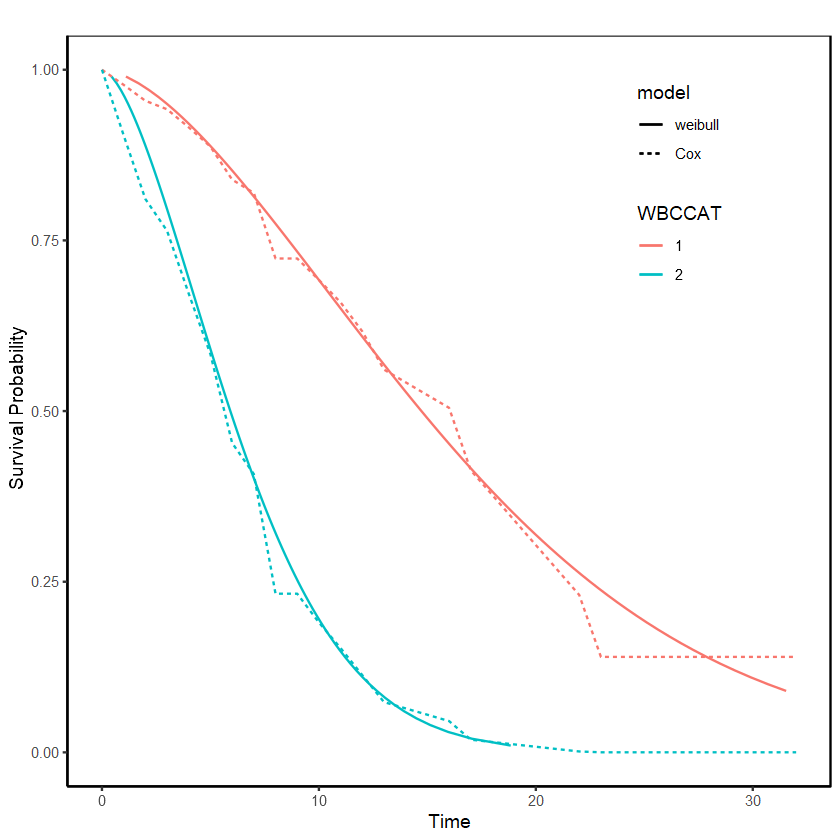

In [93]:
adjustedPlot(fit, addCox = T)